# Codigo de la figura 3.2: Modelo Hodgkin-Huxley y canales de activación



# 0. Importar bibliotecas

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 1. Variables de entorno

## Parámetros del Modelo de Hodgkin-Huxley

- `gNa`: Conductancia de sodio (mS/cm^2).
- `gK`: Conductancia de potasio (mS/cm^2).
- `gL`: Conductancia de leakage (mS/cm^2).
- `ENa`: Potencial de equilibrio para sodio (mV).
- `EK`: Potencial de equilibrio para potasio (mV).
- `EL`: Potencial de equilibrio para leakage (mV).
- `Vm`: Potencial de membrana en reposo (mV).
- `I = 8.0`: Estímulo externo.
- `dt`: Paso de tiempo en la simulación (ms).
- `t_max`: Tiempo máximo de simulación (ms).

## Inicialización de Variables

- `num_steps`: Número de pasos en la simulación.
- `time`: Espacio de tiempo para la simulación.
- `V`: Potencial de membrana a lo largo del tiempo.
- `m`: Variable de compuerta de activación de sodio a lo largo del tiempo.
- `h`: Variable de compuerta de inactivación de sodio a lo largo del tiempo.
- `n`: Variable de compuerta de potasio a lo largo del tiempo.

## Condiciones Iniciales
- `V[0]`: Potencial de membrana en el tiempo inicial.
- `m[0]`: Condición inicial para la variable `m`.
- `h[0]`: Condición inicial para la variable `h`.
- `n[0]`: Condición inicial para la variable `n`.


In [2]:
gNa = 120.0
gK = 36.0
gL = 0.3
ENa = 55.0
EK = -82.0
EL = -55.0
Vm = -65.0
I = 8.0
dt = 0.01
t_max = 50.0
num_steps = int(t_max / dt)
time = np.arange(0, t_max, dt)
V = np.zeros(num_steps)
m = np.zeros(num_steps)
h = np.zeros(num_steps)
n = np.zeros(num_steps)
V[0] = Vm
m[0] = 0.05
h[0] = 0.6
n[0] = 0.32

# 2. Funciones

- `alpha_m(V)`: Tasa de transición de la variable de compuerta de activación de sodio `m`.
- `beta_m(V)`: Tasa de transición inversa de la variable `m`.
- `alpha_h(V)`: Tasa de transición de la variable de compuerta de inactivación de sodio `h`.
- `beta_h(V)`: Tasa de transición inversa de la variable `h`.
- `alpha_n(V)`: Tasa de transición de la variable de compuerta de potasio `n`.
- `beta_n(V)`: Tasa de transición inversa de la variable `n`.

Cada función depende del potencial de membrana `V`.


In [3]:
def alpha_m(V):
    return 0.1 * (V + 40.0) / (1.0 - np.exp(-(V + 40.0) / 10.0))

def beta_m(V):
    return 4.0 * np.exp(-(V + 65.0) / 18.0)

def alpha_h(V):
    return 0.07 * np.exp(-(V + 65.0) / 20.0)

def beta_h(V):
    return 1.0 / (1.0 + np.exp(-(V + 35.0) / 10.0))

def alpha_n(V):
    return 0.01 * (V + 55.0) / (1.0 - np.exp(-(V + 55.0) / 10.0))

def beta_n(V):
    return 0.125 * np.exp(-(V + 65.0) / 80.0)

# 3. Simulación del Modelo Hodgkin-Huxley

Se lleva a cabo la simulación del modelo de Hodgkin-Huxley utilizando el método de Euler:

- Actualización de las variables `m`, `h`, y `n` mediante las ecuaciones de tasas de transición.


\begin{cases}
    \frac{dn}{dt} = \alpha_n (1 - n) - \beta_n n \\
    \frac{dm}{dt} = \alpha_m (1 - m) - \beta_m m \\
    \frac{dh}{dt} = \alpha_h (1 - h) - \beta_h h
\end{cases}


- Cálculo de las conductancias instantáneas `gNa_t`, `gK_t`, y `gL_t`.

\begin{cases}
    G_{\text{Na}} = \bar{g}_{\text{Na}} m^3 h \\
    G_{\text{K}} = \bar{g}_{\text{K}} n^4 \\
    G_{\text{L}} = \bar{g}_{\text{L}}
\end{cases}

- Cálculo de las corrientes de sodio `INa`, potasio `IK`, y fuga `IL`.
- Actualización del potencial de membrana `V` considerando las corrientes y el estímulo externo.

El bucle se ejecuta para cada paso de tiempo en la simulación.

In [4]:
for i in range(1, num_steps):
    m[i] = m[i - 1] + dt * (alpha_m(V[i - 1]) * (1.0 - m[i - 1]) - beta_m(V[i - 1]) * m[i - 1])
    h[i] = h[i - 1] + dt * (alpha_h(V[i - 1]) * (1.0 - h[i - 1]) - beta_h(V[i - 1]) * h[i - 1])
    n[i] = n[i - 1] + dt * (alpha_n(V[i - 1]) * (1.0 - n[i - 1]) - beta_n(V[i - 1]) * n[i - 1])

    gNa_t = gNa * (m[i - 1] ** 3) * h[i - 1]
    gK_t = gK * (n[i - 1] ** 4)
    gL_t = gL

    INa = gNa_t * (V[i - 1] - ENa)
    IK = gK_t * (V[i - 1] - EK)
    IL = gL_t * (V[i - 1] - EL)

    V[i] = V[i - 1] + dt * (I - INa - IK - IL)

# 4. Grafica del modelo HH y canales de activación

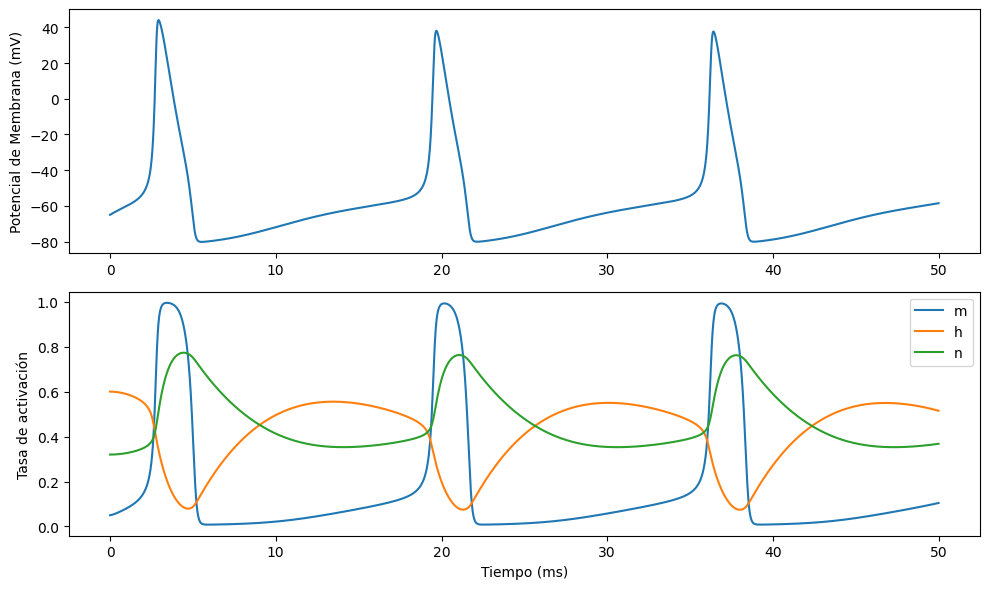

In [5]:
plt.figure(figsize=(10, 6))
plt.subplot(2, 1, 1)
plt.plot(time, V)
plt.ylabel('Potencial de Membrana (mV)')
plt.subplot(2, 1, 2)
plt.plot(time, m, label='m')
plt.plot(time, h, label='h')
plt.plot(time, n, label='n')
plt.xlabel('Tiempo (ms)')
plt.ylabel('Tasa de activación')
plt.legend()
plt.tight_layout()
plt.show()